In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
#np.seterr(divide='ignore', invalid='ignore')

In [148]:
def print_line_2points(points):#from line-task 1
    XYarr= points.copy()
    n = len(XYarr)
    
    XYp = {'x':[i[0] for i in XYarr],'y':[i[1] for i in XYarr]}
    sumX = sum(XYp['x'])
    sumY = sum(XYp['y'])
    sumXY = 0.
    sumXqrt = 0.
    
    for i in XYarr:
        sumXY += i[0]*i[1]    
        sumXqrt += i[0]**2
    
    
    if n*sumXqrt - sumX**2 != 0:
        a = (n*sumXY - sumX*sumY)/(n*sumXqrt - sumX**2)
        b = (sumY - a*sumX)/n
        return a,b
    else:
        return 0.,0.

In [165]:
def print_line(XYp):#from line-task 2
    n = len(XYp['x'])
    
    sumX = sum(XYp['x'])
    sumY = sum(XYp['y'])
    sumXY = 0.
    sumXqrt = 0.
    sum_Xqrt_Y = 0.
    sumXqrt3 = 0.
    sumXqrt4 = 0.
    
    for i in range(len(XYp['y'])):
        sumXY += XYp['x'][i]*XYp['y'][i]
        sumXqrt += XYp['x'][i]**2
    
    a = (n*sumXY - sumX*sumY)/(n*sumXqrt - sumX**2)
    b = (sumY - a*sumX)/n
    XYl1 = {'x':[min(XYp['x'])-3,max(XYp['x'])+3]}
    XYl1['y'] = [a*i+b for i in XYl1['x']]
    XYl2 = {'x':XYp['x'].copy()}
    XYl2['y'] = [(((i+1)**(1./3))+1) for i in XYl2['x']]
    
    otkl1 = 0.
    for i in range(n):
        otkl1 += ((XYp['y'][i]-((a*XYp['x'][i])+b))**2)

    otkl2 = 0.    
    for i in range(n):
        otkl2 += ((XYp['y'][i]-((XYp['x'][i]+1)**(1./3)+1))**2)
    
    plt.plot(XYp['x'],XYp['y'],'ro')
    
    plt.plot(XYl1['x'],XYl1['y'],color='blue')    

    plt.text(XYl1['x'][0],XYl1['y'][1],'Pogreshnost 1 = '+str(round(otkl1,4)),color='blue')
    plt.text((XYl1['x'][1]-(XYl1['x'][1]-XYl1['x'][0])*0.15),XYl1['y'][1],'line 1',color='blue')
    plt.title('y = ('+str(round(a,4))+')x+('+str(round(b,4))+')')

In [166]:
def line(x, a, b, s):
    y = a*x + b
    y += s * np.random.randn(len(y))    
    return np.array([x,y])

In [167]:
def noise(MinXY,MaxXY,size_points):
    return [[rd.uniform(MinXY[0],MaxXY[0]) for i in range(size_points)],[rd.uniform(MinXY[1],MaxXY[1]) for i in range(size_points)]]

In [168]:
size_points = {'noise':70,'line':20}
inter = {'min':1,'max':500}
inter['del'] = (inter['max']-inter['min'])/size_points['line']
a = 2.
b = 10.
s = 1.

points_line = line(np.arange(inter['min'],inter['max'],inter['del']),a,b,s)
points_noise = noise([points_line[0][0],points_line[1][0]],[points_line[0][-1],points_line[1][-1]],size_points['noise'])

points=[0.,0.]
points[0] = np.concatenate([points_line[0],points_noise[0]])
points[1] = np.concatenate([points_line[1],points_noise[1]])

In [169]:
def print_RANSAC(points,t,k):
    model = [0.,0.]
    inline_size = 0.
    for i in range(k):
        model_tmp = [0.,0.]
        inline_size_tmp = 0.
        number_2p=[rd.randint(1,len(points[0])-1),rd.randint(1,len(points[0])-1)]        
                
        two_points = [[points[0][number_2p[0]],points[1][number_2p[0]]],[points[0][number_2p[1]],points[1][number_2p[1]]]]
        a,b = print_line_2points(two_points)
        model_tmp = [a,b]
        
        for j in range(len(points[0])):
            x = points[0][j]
            y = points[1][j]
            
            y1 = a*x+(b-t)
            y2 = a*x+(b+t)
            
            if (y1>y2):
                y1,y2 = y2,y1
            #print(y1,'<',y,'<',y2,'     inline_size_tmp = ',inline_size_tmp,'  x=',x,'  y=',y,'\n')
            if (y1<y and y<y2):
                inline_size_tmp+=1
        
        if (inline_size< inline_size_tmp):
            model = model_tmp
            inline_size = inline_size_tmp
                
        
    a = model[0]
    b = model[1]
    XYl={'x':[min(points[0]),max(points[0])]}
    XYl['y'] = [a*x+b for x in XYl['x']]
    
    Y_t=[[a*x+b-t for x in XYl['x']],[a*x+b+t for x in XYl['x']]]
    
    
    plt.plot(points[0],points[1],'ro')
    
    plt.plot(XYl['x'],XYl['y'],color='blue')
    plt.plot(XYl['x'],Y_t[0],color='green', linestyle = '--')
    plt.plot(XYl['x'],Y_t[1],color='green', linestyle = '--')
    plt.title('y = ('+str(round(a,4))+')x+('+str(round(b,4))+')')

In [170]:
XYp={'x':points[0],'y':points[1]}

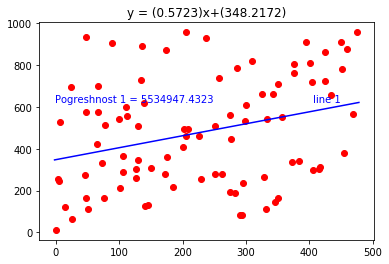

In [171]:
print_line(XYp)#

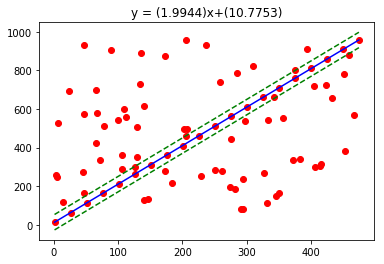

In [172]:
print_RANSAC(points,40,150)